In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('fsrdataset.csv')

In [4]:
data.head()

,UID,Insurance Name,IN vs OON,LOC,Month DOS,Location,DOS,Orig Mo Billed,Units,IN Billed,...,Days Past Due,Age: 1-30,Age: 31-60,Age: 61-90,Age: 91+,Date Paid,Q1: Jan-Mar,Q2: Apr-Jun,Q3: Jul-Sep,Days Outstanding
0,#REF!,BC/Advantek,IN,Detox,7/31/19,21877 / 22051,7/30-7/31/19,August,2,"$2,400.00",...,27,"$2,400.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-31204
1,#REF!,BC/Advantek,IN,IOP,7/31/19,2121 / 22051,7/9/19,July,1,$300.00,...,0,NaN,$ -,NaN,NaN,7/31/19,$ -,$ -,$280.00,12
2,#REF!,BC/Advantek,IN,IOP,7/31/19,2121 / 22051,7/1-7/5/19,July,4,"$1,200.00",...,0,NaN,$ -,NaN,NaN,7/24/19,$ -,$ -,"$1,120.00",12
3,#REF!,Kaiser,IN,RTC,7/31/19,22051,7/6-7/9/19,July,4,"$3,040.00",...,0,NaN,$ -,NaN,NaN,8/1/19,$ -,$ -,"$3,040.00",13
4,#REF!,Kaiser,IN,RTC,7/31/19,22051,7/1-7/5/19,July,5,"$3,800.00",...,0,NaN,$ -,NaN,NaN,7/26/19,$ -,$ -,"$3,800.00",14


In [5]:
data.columns

Index(['UID', 'Insurance Name', 'IN vs OON', 'LOC', 'Month DOS', 'Location',
       'DOS', 'Orig Mo Billed', 'Units', 'IN Billed', 'IN Contract Due',
       'OON Billed', 'Date Billed', 'IN Ins Pmnt', 'IN MOOP', 'OON Ins Pmnt',
       'OON MOOP', 'MOOP', 'Allowed', 'Bal Bill', 'Med Rec in Appeal',
       'Med Rec Appeal Loss', 'Balance', 'Per Diem Rate', 'OON % Paid',
       '% Paid', 'Days Past Due', 'Age: 1-30', 'Age: 31-60', 'Age: 61-90',
       'Age: 91+', 'Date Paid', 'Q1: Jan-Mar', 'Q2: Apr-Jun', 'Q3: Jul-Sep',
       'Days Outstanding'],
      dtype='object')

In [6]:
units_by_month = data.groupby(['Month DOS'])['Units'].sum()

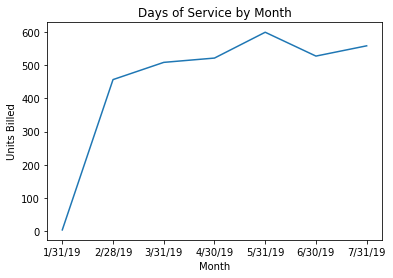

In [7]:
plt.plot(units_by_month)
plt.ylabel('Units Billed')
plt.xlabel('Month')
plt.title('Days of Service by Month')
plt.show()

This graph shows that volume of services have been increasing steadily throughout 2019. The explaination for the low volume of services rendered in the month of January 2019 was due to lack of data available for that particular month

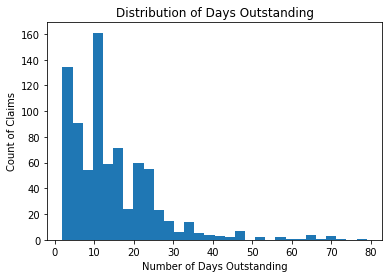

In [20]:
y = data['Days Outstanding']

filter = y>0

plt.hist(y[filter], bins=30)
plt.title('Distribution of Days Outstanding')
plt.xlabel('Number of Days Outstanding')
plt.ylabel('Count of Claims')
plt.show()

This visualisation shows that the number of days an insurance claim is outstanding is not normally distributed. A large number of claims pay within 5 days, there is another grouping of claims that pays around 12-15 days. A more informational viz of this data might be a box plot.

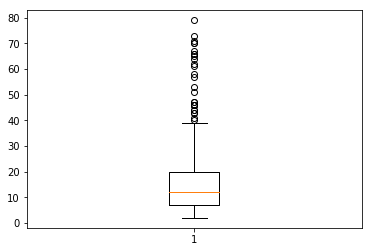

In [22]:
y = data['Days Outstanding']

filter = y>0

plt.boxplot(y[filter])
plt.xlabel('Number of Days Outstanding')
plt.
plt.show()

This box plot shows that the median number of days a claim is outstanding is around 12 days. There are several outliers above the 40 day mark which might be explained by claims that were returned for incomplete data or the claim was sent to medical record review. However, it appears that if a claim is submitted to an insurance carrier there is a high probability that it will be paid within 40 days.

In [66]:
#pct_balance = data.groupby(['Insurance Name'])['Balance'].sum()
Total = data['Units'].sum()

<BarContainer object of 862 artists>

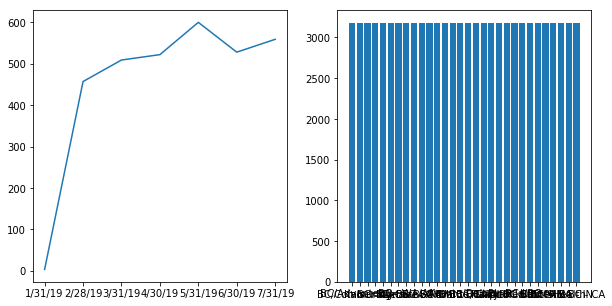

In [67]:
units_by_month = data.groupby(['Month DOS'])['Units'].sum()
insurance_by_month = data.groupby(['Insurance Name'])['Units'].sum()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(units_by_month)

plt.subplot(1,2,2)
plt.bar(data['Insurance Name'], Total)

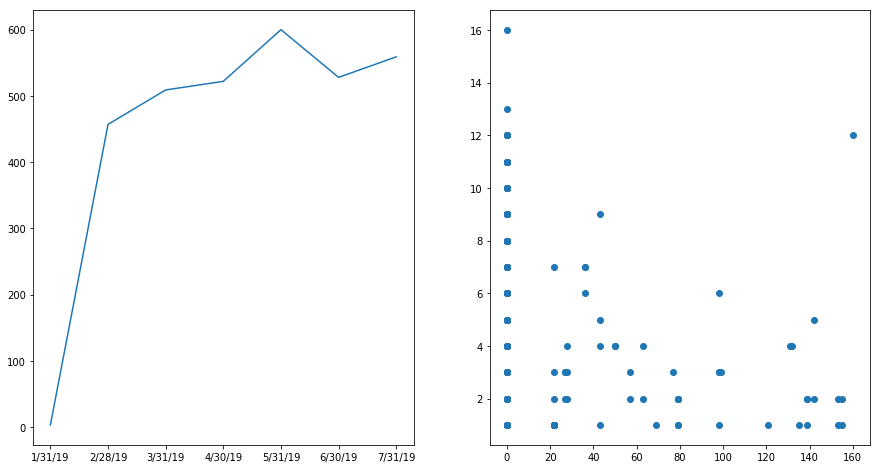

In [73]:
units_by_month = data.groupby(['Month DOS'])['Units'].sum()
insurance_by_month = data.groupby(['Insurance Name'])['Units'].sum()

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(units_by_month)

plt.subplot(1,2,2)
plt.scatter(x= data['Days Past Due'], y= data['Units'])
plt.show()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 36 columns):
UID                    862 non-null object
Insurance Name         862 non-null object
IN vs OON              862 non-null object
LOC                    862 non-null object
Month DOS              862 non-null object
Location               862 non-null object
DOS                    862 non-null object
Orig Mo Billed         862 non-null object
Units                  862 non-null int64
IN Billed              862 non-null object
IN Contract Due        862 non-null object
OON Billed             862 non-null object
Date Billed            862 non-null object
IN Ins Pmnt            805 non-null object
IN MOOP                797 non-null object
OON Ins Pmnt           801 non-null object
OON MOOP               801 non-null object
MOOP                   862 non-null object
Allowed                862 non-null object
Bal Bill               806 non-null object
Med Rec in Appeal      807 non-null 

In [ ]:
# Balances were non-null object type - xls vs. csv?
# 